In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from IPython.display import display, HTML
import datetime

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame()
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[15:]:
            short_name = csv_file[15:]
            #print(short_name)
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            year = short_name[0:4]
            month = short_name[5:7]
            day =short_name[8:10]
            date = year + '-' + month + '-' + day
            #print(date)
            
            df_temp['date'] = date
            df_temp.date = pd.to_datetime(df_temp.date)
            df_temp.set_index(df_temp.date, inplace=True)
            df_temp.drop(columns=['date'], inplace=True)
            
            df = pd.concat([df, df_temp])
#print(list_data)

sns.set_style("whitegrid")


In [2]:
df.sort_index(inplace = True)
df['year'] = df.index.year

In [3]:
df.describe()

Unnamed: 0  Unnamed: 0.1         index      Position       Streams  \
count  37400.000000  37400.000000  37400.000000  37400.000000  3.740000e+04   
mean      99.500000     99.500000    100.500000    100.500000  4.602958e+05   
std       57.735077     57.735077     57.735077     57.735077  4.459066e+05   
min        0.000000      0.000000      1.000000      1.000000  5.154300e+04   
25%       49.750000     49.750000     50.750000     50.750000  2.242008e+05   
50%       99.500000     99.500000    100.500000    100.500000  3.365395e+05   
75%      149.250000    149.250000    150.250000    150.250000  5.272985e+05   
max      199.000000    199.000000    200.000000    200.000000  8.223614e+06   

       danceability        energy          key      loudness          mode  \
count  37400.000000  37400.000000  37400.00000  37400.000000  37400.000000   
mean       0.688842      0.677593      5.24139     -6.025736      0.549893   
std        0.121516      0.136627      3.69074      1.926925      0.497511   
min        0.168000      0.027900      0.00000    -34.475000      0.000000   
25%        0.617000      0.587000      1.00000     -7.049000      0.000000   
50%        0.703000      0.689000      6.00000     -5.773000      1.000000   
75%        0.774000      0.778000      8.00000     -4.792000      1.000000   
max        0.971000      0.982000     11.00000     -0.928000      1.000000   

       ...  acousticness  instrumentalness      liveness       valence  \
count  ...  37400.000000      37400.000000  37400.000000  37400.000000   
mean   ...      0.201420          0.003916      0.165624      0.497279   
std    ...      0.197855          0.043100      0.126501      0.208633   
min    ...      0.000176          0.000000      0.019600      0.034300   
25%    ...      0.052200          0.000000      0.093100      0.339000   
50%    ...      0.137000          0.000000      0.118000      0.497000   
75%    ...      0.283000          0.000003      0.188000      0.657000   
max    ...      0.994000          0.918000      0.921000      0.968000   

              tempo  time_signature    duration_ms  Unnamed: 0.1.1  \
count  37400.000000    37400.000000   37400.000000     1800.000000   
mean     119.560290        3.979091  200521.146070       99.500000   
std       27.401078        0.211797   34946.322285       57.750349   
min       53.808000        1.000000   35240.000000        0.000000   
25%       98.098000        4.000000  178120.000000       49.750000   
50%      119.939000        4.000000  200976.000000       99.500000   
75%      135.952000        4.000000  220293.000000      149.250000   
max      212.117000        5.000000  526387.000000      199.000000   

       Unnamed: 0.1.1.1          year  
count        200.000000  37400.000000  
mean          99.500000   2018.331551  
std           57.879185      1.053259  
min            0.000000   2017.000000  
25%           49.750000   2017.000000  
50%           99.500000   2018.000000  
75%          149.250000   2019.000000  
max          199.000000   2020.000000  

[8 rows x 21 columns]

In [4]:
top50 = df[df['Position']>=50]
top50 = top50.resample('W').mean()

In [5]:
idx = pd.MultiIndex.from_arrays([
        pd.to_datetime(top50.index.strftime('2020-%m-%d %H:%M:%S')),
        top50.index.year
    ])

d1 = top50.set_index(idx).unstack().resample('W').mean()

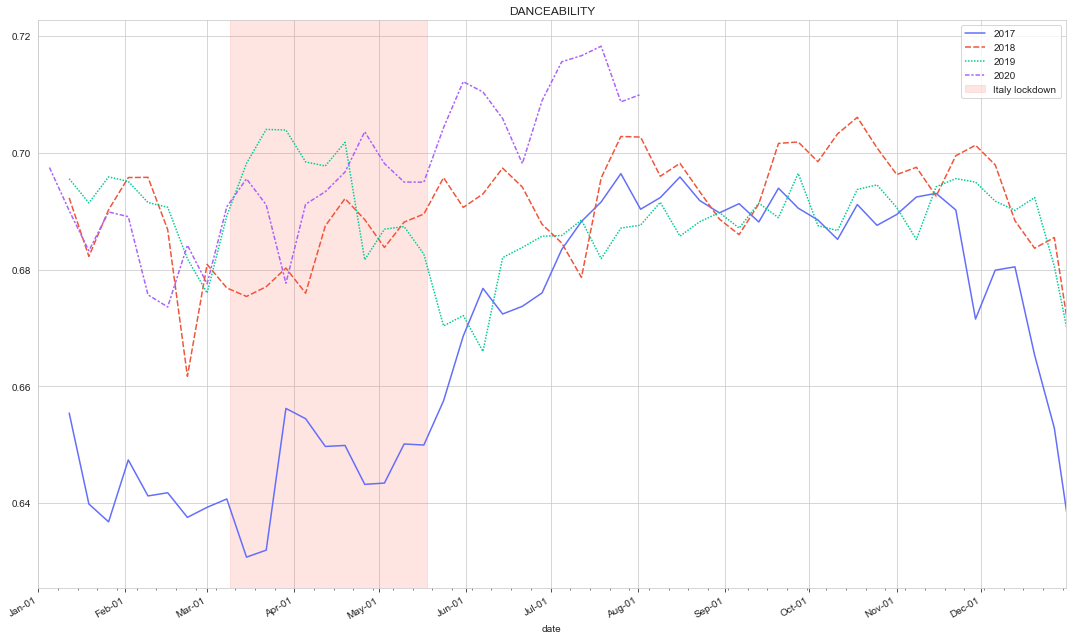

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.danceability, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='DANCEABILITY')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

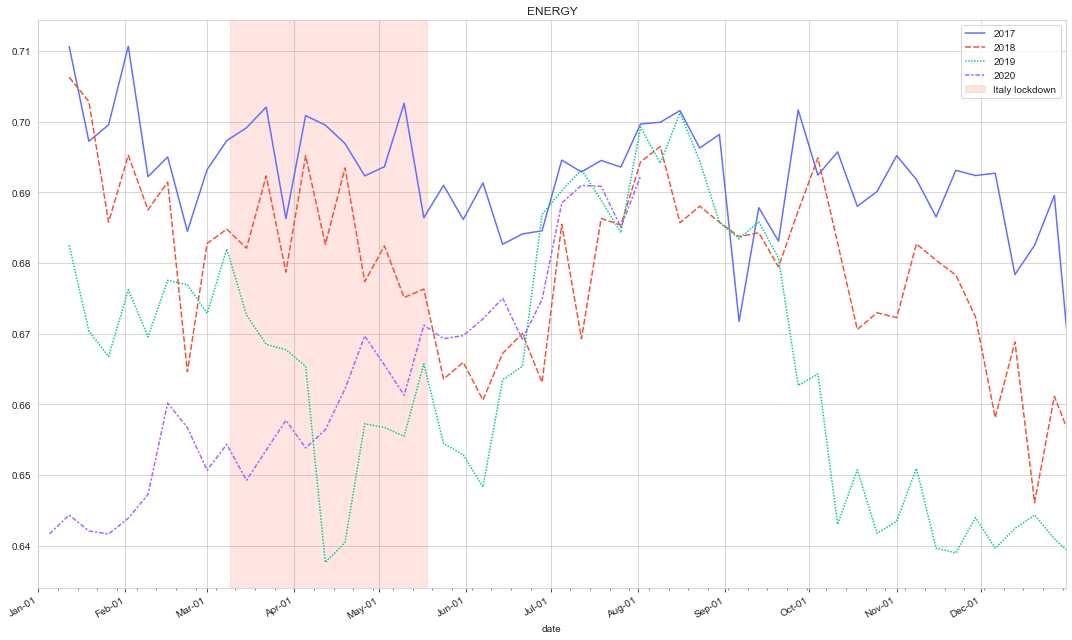

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.energy, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='ENERGY')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

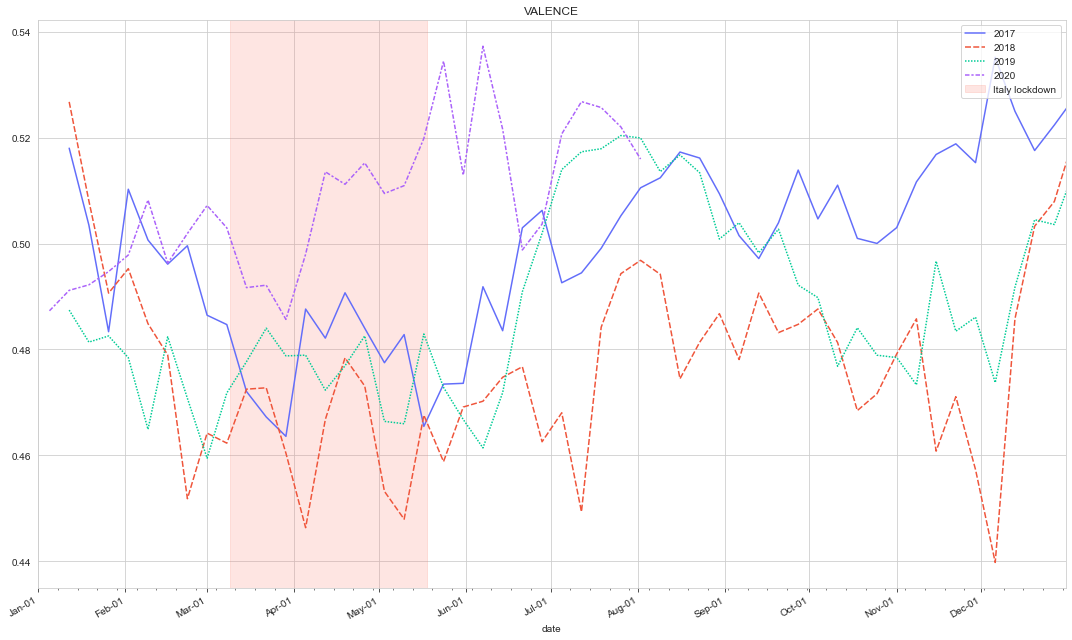

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.valence, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='VALENCE')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

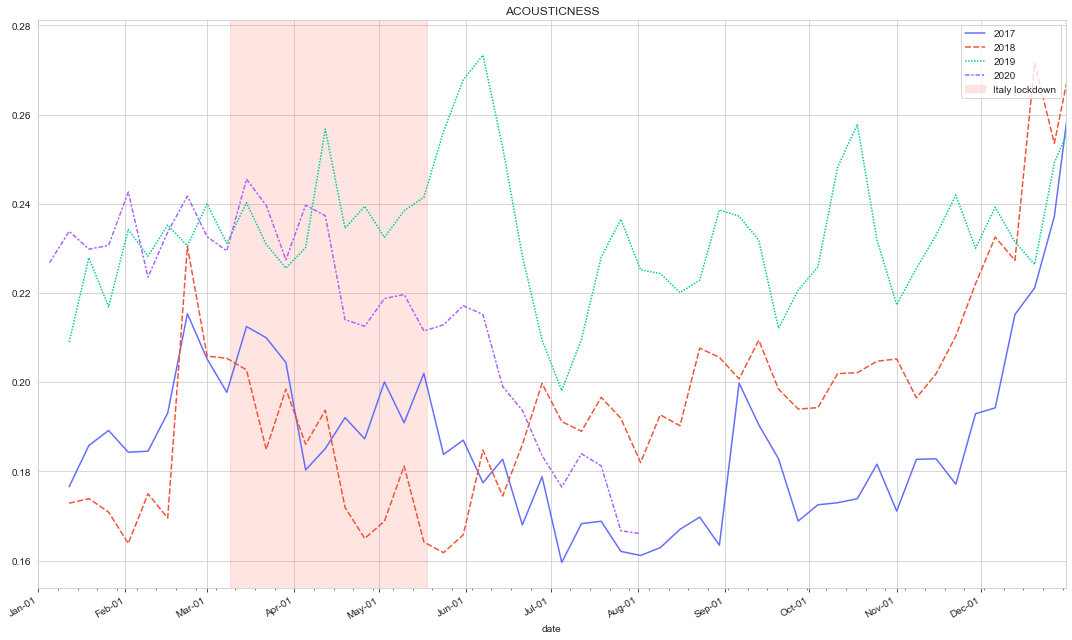

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.acousticness, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='ACOUSTICNESS')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

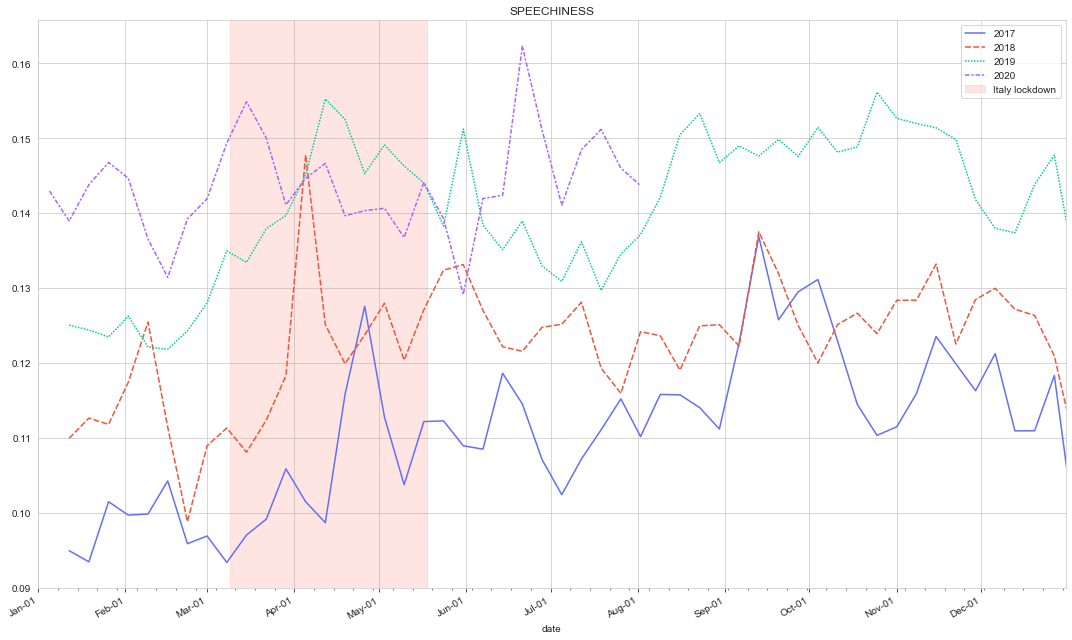

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.set_style('whitegrid')

plot = sns.lineplot(ax=ax, data=d1.speechiness, color='year',palette=flatui)
lg = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

ax.axvspan(*mdates.datestr2num(['2020-03-09', '2020-05-18']), color='salmon', alpha=0.2, label="Italy lockdown")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.tick_params(which="both", bottom=True)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.set(title='SPEECHINESS')
ax.legend(loc="upper right")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])
fig.autofmt_xdate()
fig.tight_layout()

In [11]:
import plotly.graph_objects as go

df_resampled = df[df['Position']<=50].resample('M').mean()
df_relevant = df_resampled[['danceability','energy','acousticness','valence','speechiness']]

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Scatterpolar(r=df_relevant.iloc[0],
                         theta=df_relevant.columns,
                         visible=True,
                             name = str(df_relevant.index[0].year) + '-' +  str(df_relevant.index[0].month))
             )

# Add surface trace
fig.add_trace(go.Scatterpolar(r=df_relevant.iloc[0],
                         theta=df_relevant.columns,
                         visible=True,
                             name = str(df_relevant.index[0].year) + '-' +  str(df_relevant.index[0].month))
             )

buttons1 = []
buttons2 = []

# button with one option for each dataframe
for date in df_relevant.index:
    year_month = str(date.year) +'-'+str(date.month)
    #print(df_relevant[year_month].to_numpy())
    buttons1.append({
                    'method': 'restyle',
                    'label': year_month,
                    'args': [
                        {'r': df_relevant[year_month].to_numpy(),
                         'type' : 'scatterpolar',
                        'name' : year_month}, [0]
                    ]
    }
    )

for date in df_relevant.index:
    year_month = str(date.year) +'-'+str(date.month)
    #print(df_relevant[year_month].to_numpy())
    buttons2.append({
                    'method': 'restyle',
                    'label': year_month,
                    'args': [
                        {'r': df_relevant[year_month].to_numpy(),
                         'type' : 'scatterpolar',
                        'name' : year_month}, [1]
                    ]
    }
    )

# some adjustments to the updatemenus
updatemenu = []
first_menu = dict()
second_menu = dict()
updatemenu.append(first_menu)
updatemenu.append(second_menu)

updatemenu[0]['buttons'] = buttons1
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
#updatemenu[0]['pad'] = {"r": 10, "t": 10}
updatemenu[0]['x'] = 0.1
updatemenu[0]['xanchor'] = 'left'
updatemenu[0]['y'] = 1.1
updatemenu[1]['yanchor'] = 'top'
updatemenu[1]['buttons'] = buttons2
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 0.1
updatemenu[1]['xanchor'] = 'left'

#updatemenu[1]['pad'] = {"r": 10, "t": 10}

# add dropdown menus to the figure
fig.update_layout(updatemenus=updatemenu)
fig.update_layout(
    annotations=[
        dict(text="Date 1:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left",
            font = dict(
                color='blue'
            )),
        dict(text="Date 2:", showarrow=False,
        x=0, y=0.98, yref="paper", align="left", 
             font = dict(
                color='red'
            ))
    ]
)

fig.update_layout(
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.1, 0.75]
    )),
  showlegend=True
)

fig.update_traces(fill='toself')
fig.show()

## Analysing the distribution of features across different years 

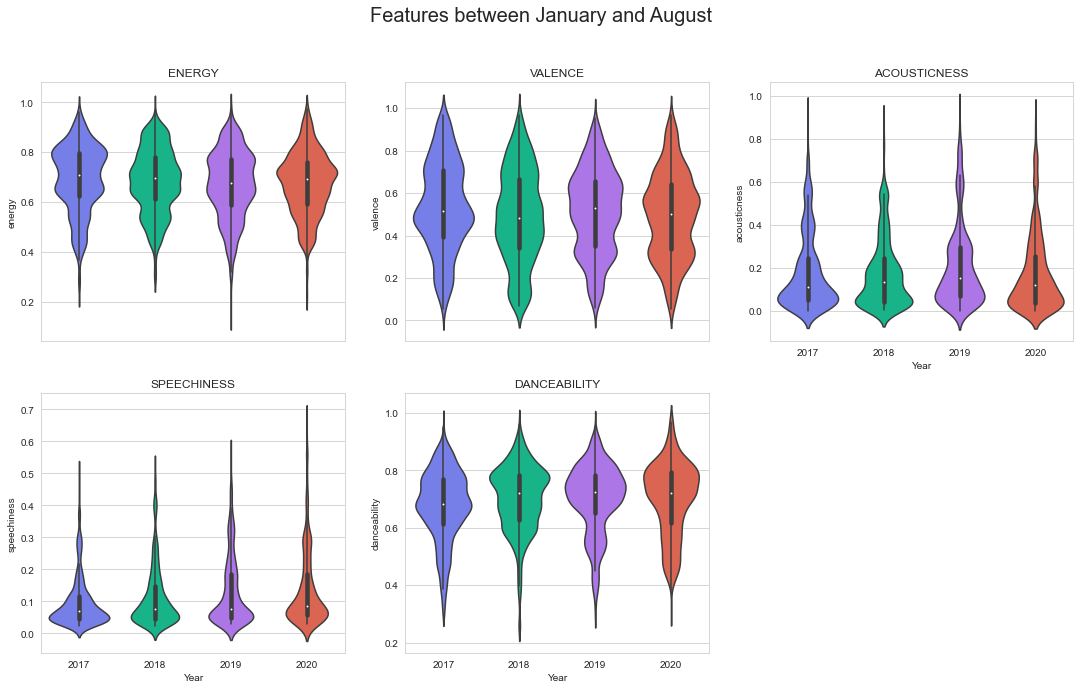

In [41]:
top50 = df[(df.index.month < 8) & (df['Position']<=50)]

fig, axs = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Features between January and August', fontsize=20)

axs[-1, -1].axis('off')

flatui = ["#636EFA", "#00CC96", "#AB63FA","#EF553B"]

#energy 
energy = sns.violinplot(ax=axs[0,0], x=top50.index.year, y="energy", data=top50, palette=flatui)
valence = sns.violinplot(ax=axs[0,1], x=top50.index.year, y='valence', data=top50, palette=flatui)
acoustic = sns.violinplot(ax=axs[0,2], x=top50.index.year, y='acousticness', data=top50, palette=flatui)
speech = sns.violinplot(ax=axs[1,0], x=top50.index.year, y='speechiness', data=top50, palette=flatui)
dance = sns.violinplot(ax=axs[1,1], x=top50.index.year, y='danceability', data=top50, palette=flatui)

energy.set_title('ENERGY')
valence.set_title('VALENCE')
acoustic.set_title('ACOUSTICNESS')
speech.set_title('SPEECHINESS')
dance.set_title('DANCEABILITY')

energy.set_xlabel('')
valence.set_xlabel('')
acoustic.set_xlabel('Year')
speech.set_xlabel('Year')
dance.set_xlabel('Year')

energy.tick_params(
    axis='x',          
    which='both',      
    bottom=False,            
    labelbottom=False)
valence.tick_params(
    axis='x',          
    which='both',      
    bottom=False,            
    labelbottom=False)